In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_general_analysis(df, asc=False):
    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())  # asc

    table_scan = pd.DataFrame(
        {
            'values_num': df.count(),
            'nan_values_num': df.isna().sum(),
            'occupancy': 100 - (df.isna().sum() / (df.isna().sum() + df.notna().sum()) * 100),
            'unique_values_num': df.nunique(),
            # 'min_value': df.min(),
            # 'max_value': df.max(),
            'unique_values': unique_values,
            'dtype': df.dtypes
        }
    )
    print('General data analysis:')
    print()
    print('Shape of the table:     ', df.shape)
    print(f'Duplicates in the table: {df.duplicated().sum()}, ({round(df.duplicated().sum() / df.shape[0], 4) * 100}%)')

    return table_scan

# 1

In [3]:
pd.read_csv('heart.csv')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
create_general_analysis(pd.read_csv('heart.csv'))

General data analysis:

Shape of the table:      (303, 14)
Duplicates in the table: 1, (0.33%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
age,303,0,100.0,41,"[77, 76, 74, 71, 70, 69, 68, 67, 66, 65, 64, 6...",int64
sex,303,0,100.0,2,"[1, 0]",int64
cp,303,0,100.0,4,"[3, 2, 1, 0]",int64
trtbps,303,0,100.0,49,"[200, 192, 180, 178, 174, 172, 170, 165, 164, ...",int64
chol,303,0,100.0,152,"[564, 417, 409, 407, 394, 360, 354, 353, 342, ...",int64
fbs,303,0,100.0,2,"[1, 0]",int64
restecg,303,0,100.0,3,"[2, 1, 0]",int64
thalachh,303,0,100.0,91,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
exng,303,0,100.0,2,"[1, 0]",int64
oldpeak,303,0,100.0,40,"[6.2, 5.6, 4.4, 4.2, 4.0, 3.8, 3.6, 3.5, 3.4, ...",float64


In [5]:
pd.read_csv('o2Saturation.csv')

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [6]:
create_general_analysis(pd.read_csv('o2Saturation.csv'))

General data analysis:

Shape of the table:      (3585, 1)
Duplicates in the table: 3568, (99.53%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
98.6,3585,0,100.0,17,"[99.6, 99.3, 98.9, 98.8, 98.6, 98.3, 98.2, 98....",float64


# 2

In [8]:
pd.read_csv('heart.csv')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
create_general_analysis(pd.read_csv('heart.csv'))

General data analysis:

Shape of the table:      (918, 12)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
Age,918,0,100.0,50,"[77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 6...",int64
Sex,918,0,100.0,2,"[M, F]",object
ChestPainType,918,0,100.0,4,"[TA, NAP, ATA, ASY]",object
RestingBP,918,0,100.0,67,"[200, 192, 190, 185, 180, 178, 174, 172, 170, ...",int64
Cholesterol,918,0,100.0,222,"[603, 564, 529, 518, 491, 468, 466, 458, 417, ...",int64
FastingBS,918,0,100.0,2,"[1, 0]",int64
RestingECG,918,0,100.0,3,"[ST, Normal, LVH]",object
MaxHR,918,0,100.0,119,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
ExerciseAngina,918,0,100.0,2,"[Y, N]",object
Oldpeak,918,0,100.0,53,"[6.2, 5.6, 5.0, 4.4, 4.2, 4.0, 3.8, 3.7, 3.6, ...",float64


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

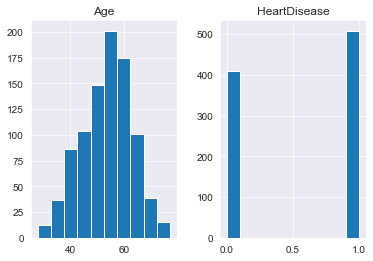

In [34]:
pd.read_csv('heart.csv')[['Age', 'HeartDisease']].hist()

<AxesSubplot:>

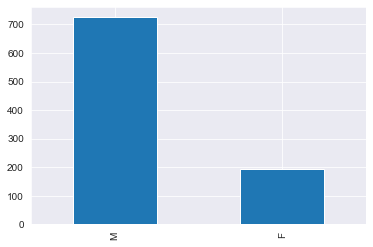

In [40]:
pd.read_csv('heart.csv')['Sex'].value_counts().plot(kind='bar')

# 3

In [10]:
pd.read_csv('heart_failure_clinical_records_dataset.csv')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
create_general_analysis(pd.read_csv('heart_failure_clinical_records_dataset.csv'))

General data analysis:

Shape of the table:      (299, 13)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
age,299,0,100.0,47,"[95.0, 94.0, 90.0, 87.0, 86.0, 85.0, 82.0, 81....",float64
anaemia,299,0,100.0,2,"[1, 0]",int64
creatinine_phosphokinase,299,0,100.0,208,"[7861, 7702, 5882, 5209, 4540, 3966, 3964, 279...",int64
diabetes,299,0,100.0,2,"[1, 0]",int64
ejection_fraction,299,0,100.0,17,"[80, 70, 65, 62, 60, 55, 50, 45, 40, 38, 35, 3...",int64
high_blood_pressure,299,0,100.0,2,"[1, 0]",int64
platelets,299,0,100.0,176,"[850000.0, 742000.0, 621000.0, 543000.0, 53300...",float64
serum_creatinine,299,0,100.0,40,"[9.4, 9.0, 6.8, 6.1, 5.8, 5.0, 4.4, 4.0, 3.8, ...",float64
serum_sodium,299,0,100.0,27,"[148, 146, 145, 144, 143, 142, 141, 140, 139, ...",int64
sex,299,0,100.0,2,"[1, 0]",int64


# 4

In [12]:
pd.read_csv('Heart_Disease_Prediction.csv')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [14]:
create_general_analysis(pd.read_csv('Heart_Disease_Prediction.csv'))

General data analysis:

Shape of the table:      (270, 14)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
Age,270,0,100.0,41,"[77, 76, 74, 71, 70, 69, 68, 67, 66, 65, 64, 6...",int64
Sex,270,0,100.0,2,"[1, 0]",int64
Chest pain type,270,0,100.0,4,"[4, 3, 2, 1]",int64
BP,270,0,100.0,47,"[200, 192, 180, 178, 174, 172, 170, 165, 160, ...",int64
Cholesterol,270,0,100.0,144,"[564, 417, 409, 407, 394, 360, 354, 353, 341, ...",int64
FBS over 120,270,0,100.0,2,"[1, 0]",int64
EKG results,270,0,100.0,3,"[2, 1, 0]",int64
Max HR,270,0,100.0,90,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
Exercise angina,270,0,100.0,2,"[1, 0]",int64
ST depression,270,0,100.0,39,"[6.2, 5.6, 4.2, 4.0, 3.8, 3.6, 3.5, 3.4, 3.2, ...",float64


# 5

In [15]:
pd.read_csv('heart_disease_uci.csv')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
create_general_analysis(pd.read_csv('heart_disease_uci.csv'))

General data analysis:

Shape of the table:      (920, 16)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
id,920,0,100.000000,920,"[920, 919, 918, 917, 916, 915, 914, 913, 912, ...",int64
age,920,0,100.000000,50,"[77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 6...",int64
sex,920,0,100.000000,2,"[Male, Female]",object
dataset,920,0,100.000000,4,"[VA Long Beach, Switzerland, Hungary, Cleveland]",object
cp,920,0,100.000000,4,"[typical angina, non-anginal, atypical angina,...",object
trestbps,861,59,93.586957,61,"[200.0, 192.0, 190.0, 185.0, 180.0, 178.0, 174...",float64
chol,890,30,96.739130,217,"[603.0, 564.0, 529.0, 518.0, 491.0, 468.0, 466...",float64
fbs,830,90,90.217391,2,"[True, False, nan]",object
restecg,918,2,99.782609,3,"[st-t abnormality, normal, lv hypertrophy, nan]",object
thalch,865,55,94.021739,119,"[202.0, 195.0, 194.0, 192.0, 190.0, 188.0, 187...",float64


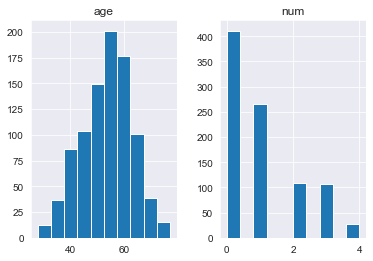

In [26]:
pd.read_csv('heart_disease_uci.csv')[['sex', 'age', 'num']].hist()
plt.show()

<AxesSubplot:>

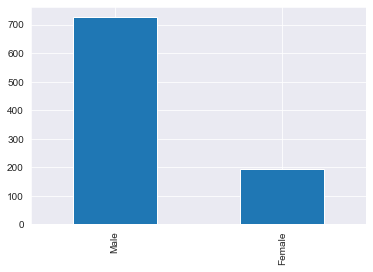

In [30]:
pd.read_csv('heart_disease_uci.csv')['sex'].value_counts().plot(kind='bar')

# 6

In [21]:
pd.read_csv('diabetes_data.csv', sep=';')

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [22]:
create_general_analysis(pd.read_csv('diabetes_data.csv', sep=';'))

General data analysis:

Shape of the table:      (520, 17)
Duplicates in the table: 269, (51.73%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
age,520,0,100.0,51,"[90, 85, 79, 72, 70, 69, 68, 67, 66, 65, 64, 6...",int64
gender,520,0,100.0,2,"[Male, Female]",object
polyuria,520,0,100.0,2,"[1, 0]",int64
polydipsia,520,0,100.0,2,"[1, 0]",int64
sudden_weight_loss,520,0,100.0,2,"[1, 0]",int64
weakness,520,0,100.0,2,"[1, 0]",int64
polyphagia,520,0,100.0,2,"[1, 0]",int64
genital_thrush,520,0,100.0,2,"[1, 0]",int64
visual_blurring,520,0,100.0,2,"[1, 0]",int64
itching,520,0,100.0,2,"[1, 0]",int64


# 7

In [17]:
pd.read_csv('Heart Attack Data Set.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
create_general_analysis(pd.read_csv('Heart Attack Data Set.csv'))

General data analysis:

Shape of the table:      (303, 14)
Duplicates in the table: 1, (0.33%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
age,303,0,100.0,41,"[77, 76, 74, 71, 70, 69, 68, 67, 66, 65, 64, 6...",int64
sex,303,0,100.0,2,"[1, 0]",int64
cp,303,0,100.0,4,"[3, 2, 1, 0]",int64
trestbps,303,0,100.0,49,"[200, 192, 180, 178, 174, 172, 170, 165, 164, ...",int64
chol,303,0,100.0,152,"[564, 417, 409, 407, 394, 360, 354, 353, 342, ...",int64
fbs,303,0,100.0,2,"[1, 0]",int64
restecg,303,0,100.0,3,"[2, 1, 0]",int64
thalach,303,0,100.0,91,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
exang,303,0,100.0,2,"[1, 0]",int64
oldpeak,303,0,100.0,40,"[6.2, 5.6, 4.4, 4.2, 4.0, 3.8, 3.6, 3.5, 3.4, ...",float64
